# <center> Organiser les examens en utilisant la théorème de 4 couleurs <center>

## Librairies

In [1]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Données

In [2]:
data = pd.read_csv('synthetic_school_enrollment_data.csv', index_col = 0)
data.head(5)

,Major,Minor,Biology of the Cell,Molecular Biology,Evolution,Biochemistry,Neurobiology,Animal Behavior,Genetics,Bioinformatics,...,Numerical Methods,Data Science,Machine Learning,Artificial Inteligence,Ecology,Chemical Geology,Physical Geology,Glaciology,Tectonics,Weather Systems
Vanessa Harris,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
James Toliver,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
Carol Tyer,Computer Science,NaN,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
Brooke Masters,Computer Science,NaN,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
Maria Cope,Math,NaN,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
data.isnull().sum()

Major                                0
Minor                              222
Biology of the Cell                  0
Molecular Biology                    0
Evolution                            0
Biochemistry                         0
Neurobiology                         0
Animal Behavior                      0
Genetics                             0
Bioinformatics                       0
Quantum Mechanics                    0
Thermodynamics                       0
Classical Mechanics                  0
Programming for Physics              0
Linear Algebra for the Sciences      0
Complex Systems                      0
Material Science                     0
Nanotechnologies                     0
Robotics                             0
Calculus I                           0
Calculus II                          0
Probability I                        0
Probability II                       0
Statistics I                         0
Statistics II                        0
Linear Algebra           

In [4]:
data.dtypes

Major                              object
Minor                              object
Biology of the Cell                  bool
Molecular Biology                    bool
Evolution                            bool
Biochemistry                         bool
Neurobiology                         bool
Animal Behavior                      bool
Genetics                             bool
Bioinformatics                       bool
Quantum Mechanics                    bool
Thermodynamics                       bool
Classical Mechanics                  bool
Programming for Physics              bool
Linear Algebra for the Sciences      bool
Complex Systems                      bool
Material Science                     bool
Nanotechnologies                     bool
Robotics                             bool
Calculus I                           bool
Calculus II                          bool
Probability I                        bool
Probability II                       bool
Statistics I                      

## Prétraitement de données

In [5]:
# supprimer les colonnes qu'on n'as pas besoin maintenant 
data = data.drop(['Major', 'Minor'], axis=1)
data.head(5)

,Biology of the Cell,Molecular Biology,Evolution,Biochemistry,Neurobiology,Animal Behavior,Genetics,Bioinformatics,Quantum Mechanics,Thermodynamics,...,Numerical Methods,Data Science,Machine Learning,Artificial Inteligence,Ecology,Chemical Geology,Physical Geology,Glaciology,Tectonics,Weather Systems
Vanessa Harris,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
James Toliver,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
Carol Tyer,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
Brooke Masters,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
Maria Cope,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data_T = data.T 
data_T.head(5)

,Vanessa Harris,James Toliver,Carol Tyer,Brooke Masters,Maria Cope,Harold Ray,Dorothy Sadler,Allen Previte,William Evens,Gina Lewis,...,John Fulton,Mary Martinez,David Lester,Christopher Weimer,William Leab,Peter Moran,Minerva Evans,Larry Unga,Christine Lee,Bonita Senay
Biology of the Cell,False,False,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
Molecular Biology,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,True,False,False,False,False,False
Evolution,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,False,False
Biochemistry,False,False,False,False,False,True,False,True,False,False,...,True,True,True,False,False,False,True,False,False,False
Neurobiology,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [7]:
liste_detudiants = list(data_T.columns)[:]
liste_detudiants

['Vanessa Harris',
 'James Toliver',
 'Carol Tyer',
 'Brooke Masters',
 'Maria Cope',
 'Harold Ray',
 'Dorothy Sadler',
 'Allen Previte',
 'William Evens',
 'Gina Lewis',
 'Leanna Hamm',
 'Willie Ramos',
 'Johnny Cilley',
 'Maria Tatro',
 'Cedric Croom',
 'Rachel Compton',
 'Felix Tauber',
 'Christopher Petersen',
 'Bridget Gil',
 'Julie Stevens',
 'Daniel Eubanks',
 'Jay Duncan',
 'Clifford Stephens',
 'Jorge Mcmanus',
 'Dawn Armstrong',
 'Gregory Varela',
 'Patrick Krieger',
 'Mark Scott',
 'Richard Turner',
 'Robert Siller',
 'Lois Szeto',
 'Jose Sanchez',
 'Lori Craig',
 'Stacey Johnson',
 'John Gilmore',
 'David Cook',
 'Dean Kahler',
 'Gloria Fuchs',
 'Jose Baldwin',
 'Mary Auld',
 'James Gloor',
 'Howard Wang',
 'Adela Felton',
 'Shirley Lane',
 'Omar Solomon',
 'Robert Pardo',
 'Henry Scott',
 'Tommy Cash',
 'Franklin Zien',
 'James Wilkins',
 'Christine White',
 'Alicia Devit',
 'Melonie Moskowitz',
 'Donald Lindley',
 'Alice Malinowski',
 'Shane Goldsberry',
 'Christian Muzzy

In [8]:
liste_descours = data_T._stat_axis.values.tolist()
liste_descours

['Biology of the Cell',
 'Molecular Biology',
 'Evolution',
 'Biochemistry',
 'Neurobiology',
 'Animal Behavior',
 'Genetics',
 'Bioinformatics',
 'Quantum Mechanics',
 'Thermodynamics',
 'Classical Mechanics',
 'Programming for Physics',
 'Linear Algebra for the Sciences',
 'Complex Systems',
 'Material Science',
 'Nanotechnologies',
 'Robotics',
 'Calculus I',
 'Calculus II',
 'Probability I',
 'Probability II',
 'Statistics I',
 'Statistics II',
 'Linear Algebra',
 'Geometry',
 'Programming for Mathematics',
 'Programming Introduction',
 'Algorithms',
 'Software Engineering',
 'Programming in C++',
 'Numerical Methods',
 'Data Science',
 'Machine Learning',
 'Artificial Inteligence',
 'Ecology',
 'Chemical Geology',
 'Physical Geology',
 'Glaciology',
 'Tectonics',
 'Weather Systems']

In [9]:
liste_des_courslies = []
for etudiant in liste_detudiants:
  liste_des_courslies.append(list(data_T.loc[data_T[etudiant]].index))

In [10]:
print(liste_des_courslies)

[['Software Engineering', 'Programming in C++', 'Data Science', 'Machine Learning', 'Artificial Inteligence'], ['Programming Introduction', 'Programming in C++', 'Data Science', 'Machine Learning', 'Artificial Inteligence'], ['Programming Introduction', 'Algorithms', 'Programming in C++', 'Data Science', 'Machine Learning'], ['Programming Introduction', 'Algorithms', 'Programming in C++', 'Numerical Methods', 'Artificial Inteligence'], ['Calculus I', 'Probability I', 'Statistics I', 'Linear Algebra', 'Programming for Mathematics'], ['Biology of the Cell', 'Biochemistry', 'Genetics', 'Programming in C++', 'Artificial Inteligence'], ['Calculus I', 'Probability I', 'Probability II', 'Statistics I', 'Programming for Mathematics'], ['Biology of the Cell', 'Molecular Biology', 'Evolution', 'Biochemistry', 'Bioinformatics'], ['Programming in C++', 'Numerical Methods', 'Data Science', 'Machine Learning', 'Artificial Inteligence'], ['Programming Introduction', 'Algorithms', 'Programming in C++'

## Graphe initial

C:\Users\lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


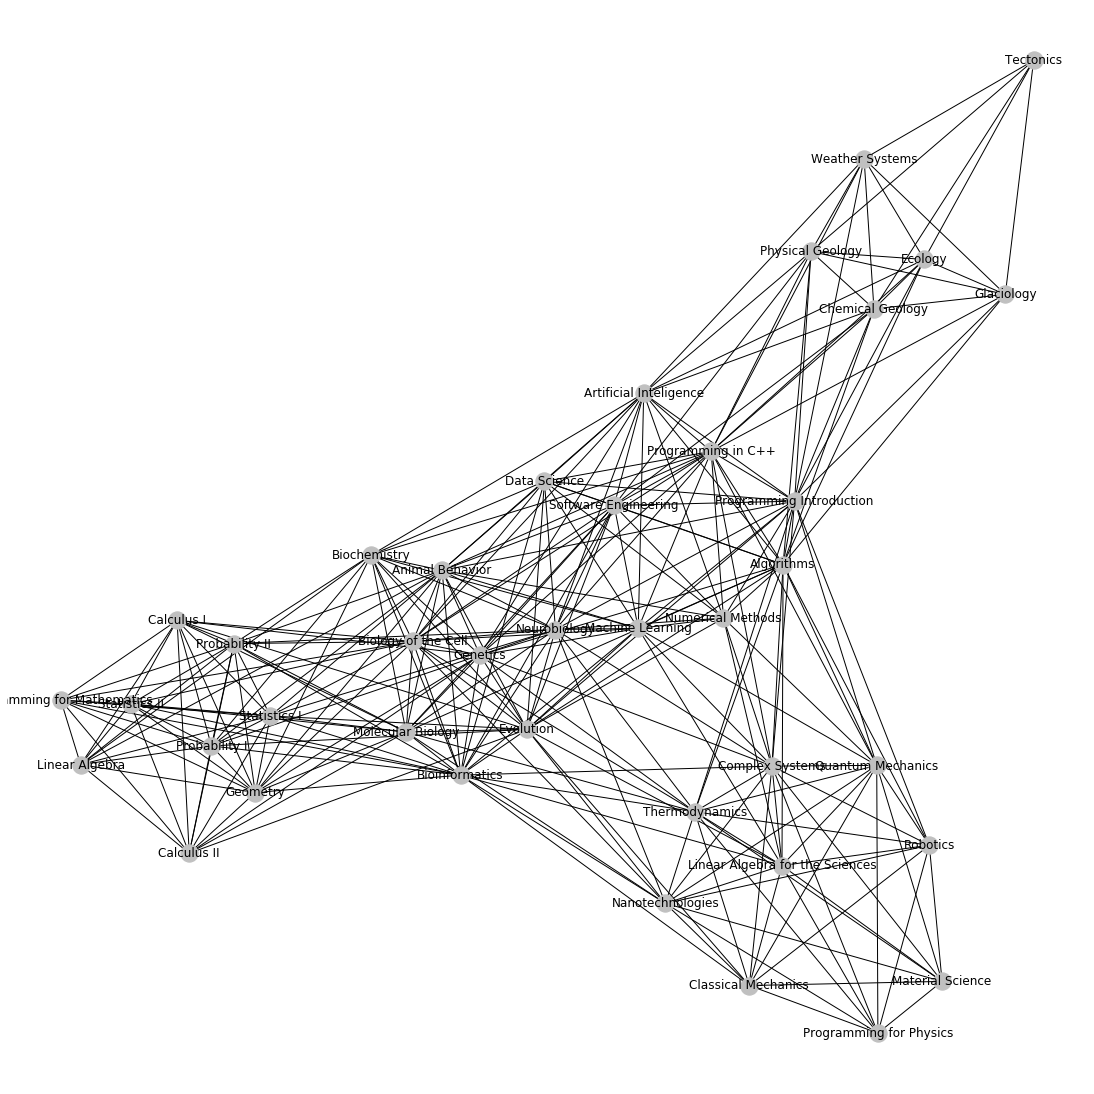

In [11]:
graphe_de_cours = nx.Graph()
graphe_de_cours.add_nodes_from(liste_descours)
import itertools
for sousliste in liste_des_courslies:
   for pair in itertools.combinations(sousliste, 2):
      graphe_de_cours.add_edge(pair[0], pair[1])
plt.figure(figsize=(15,15))
nx.draw(graphe_de_cours,node_color = 'silver',with_labels = True)
plt.show()

## Quelque paramètres de graphe

In [12]:
nbre_nodes = len(list(graphe_de_cours.nodes))
nbre_edges_possible = (nbre_nodes*(nbre_nodes-1))/2
print(nbre_nodes)
print(nbre_edges_possible)

40
780.0


In [13]:
nbre_edges_total = len(list(graphe_de_cours.edges))
print(nbre_edges_total)

273


La degrée de notre graphe

Nous trouvons le degrée est 21, donc on a besoin 22 (= 21+1)couleurs à faire la coloration au minimun.

In [14]:
max(dict(graphe_de_cours.degree).values())

21

Le liste des couleurs 

Chaque couleur signifie une horaire d'un examen, et nous voulons mettre le temps de chaque cours voisiné différent(cad que le couleurs de sommet voisinage est différents) 

In [15]:
colors = [ "darkorange", "moccasin","blueviolet", "magenta", "lightsteelblue", "gold", "yellow",
          "darkolivegreen", "chartreuse","forestgreen", "lime", "mediumaquamarine", "turquoise", 
          "teal", "cadetblue","lightcoral", "gray", "lightgray", "chocolate",
          "dogerblue", "blue", "slateblue"]

Les jours des examens 

In [16]:
from datetime import datetime
jours = []
calendrier = {}
for i in list(range(4,10)):
    for j in list(range(9,18,2)):
        jour = datetime(2021, 12, i, j, 0)
        jours.append(jour)
        calendrier[jour] = []

In [17]:
len(graphe_de_cours)

40

In [18]:
de_couleurs_a_jour = {col: jours[i] for i, col in enumerate(colors)}

## Algorithme

In [19]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) 
    for node in nodes:
        dict_neighbors = dict(network[node])
        nodes_neighbors = list(dict_neighbors.keys())
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                continue
            else:
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']
                forbidden_colors.append(forbidden_color)
        for color in colors:
            if color in forbidden_colors:
                continue
            else:
                network.nodes[node]['color'] = color
                break

In [20]:
greedy_coloring_algorithm(graphe_de_cours, colors)

## Le graphe coloré

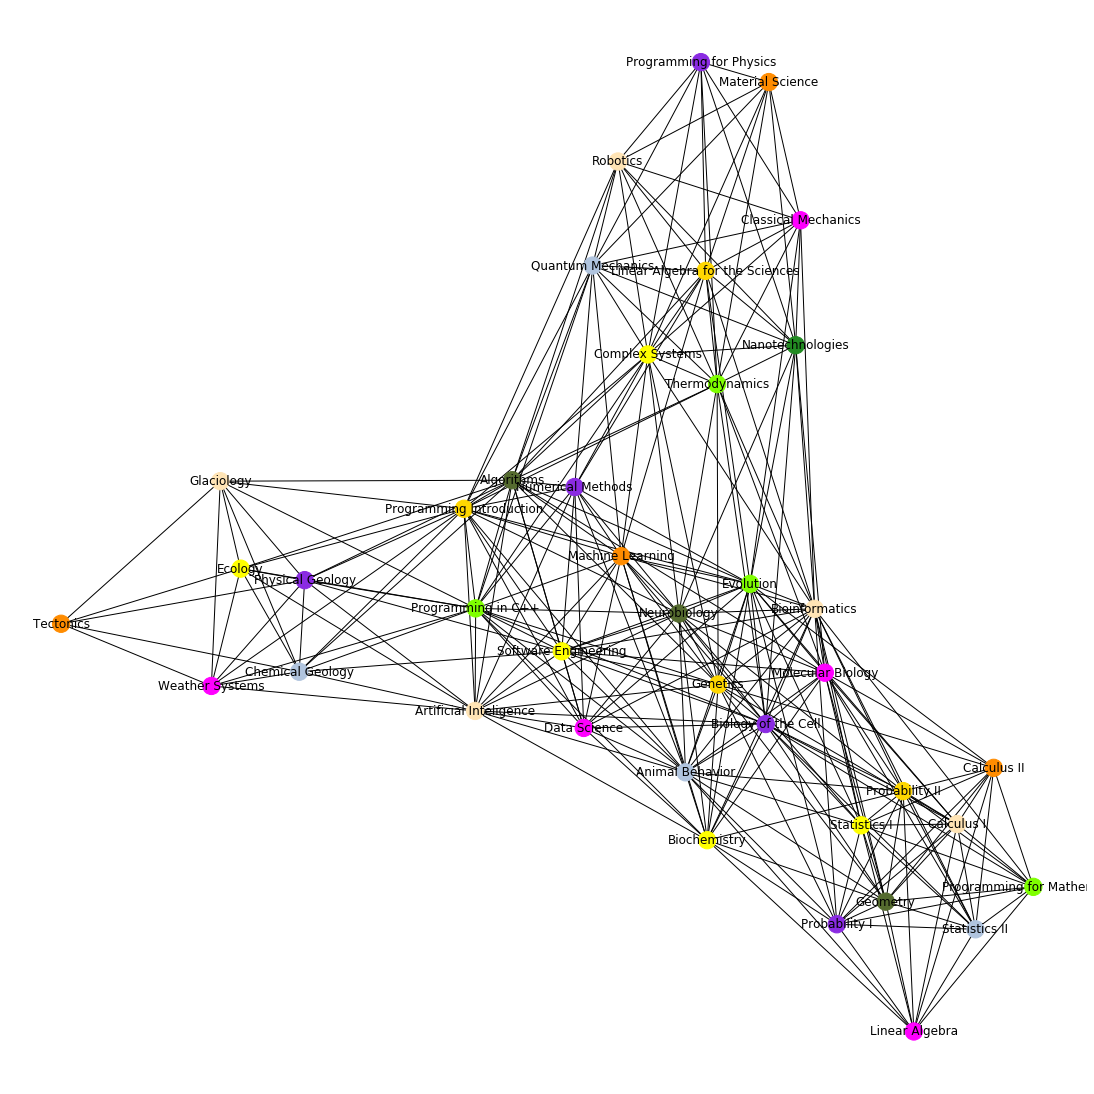

In [21]:
colors_nodes = [data['color'] 
for v, data in graphe_de_cours.nodes(data=True)]
plt.figure(figsize=(15,15))
nx.draw(graphe_de_cours, node_color=colors_nodes, with_labels=True)
plt.show()

In [22]:
number = []
for i in list(range(0,50)):
    greedy_coloring_algorithm(graphe_de_cours, colors)
    colors_nodes = [data['color'] for v, data in graphe_de_cours.nodes(data=True)]
    num_col = len(set(colors_nodes))
    number.append(num_col)

In [23]:
print(number)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [24]:
colors_used = list(set(colors_nodes))

In [25]:
print(len(colors_used))

10


In [26]:
colors_used

['darkorange',
 'lightsteelblue',
 'forestgreen',
 'yellow',
 'gold',
 'magenta',
 'darkolivegreen',
 'blueviolet',
 'chartreuse',
 'moccasin']

## Les sommets qui sont en couleur identique

In [27]:
for col in colors_used :
    for v,data in graphe_de_cours.nodes(data=True):
        if data['color'] == col:
            print('Couleur : %s, matière: %s'%(col,v))

Couleur : darkorange, matière: Material Science
Couleur : darkorange, matière: Calculus II
Couleur : darkorange, matière: Machine Learning
Couleur : darkorange, matière: Tectonics
Couleur : lightsteelblue, matière: Animal Behavior
Couleur : lightsteelblue, matière: Quantum Mechanics
Couleur : lightsteelblue, matière: Statistics II
Couleur : lightsteelblue, matière: Chemical Geology
Couleur : forestgreen, matière: Nanotechnologies
Couleur : yellow, matière: Biochemistry
Couleur : yellow, matière: Complex Systems
Couleur : yellow, matière: Statistics I
Couleur : yellow, matière: Software Engineering
Couleur : yellow, matière: Ecology
Couleur : gold, matière: Genetics
Couleur : gold, matière: Linear Algebra for the Sciences
Couleur : gold, matière: Probability II
Couleur : gold, matière: Programming Introduction
Couleur : magenta, matière: Molecular Biology
Couleur : magenta, matière: Classical Mechanics
Couleur : magenta, matière: Linear Algebra
Couleur : magenta, matière: Data Science
C

## Résultat(L'emploi du temps des examens)

In [28]:
for v, data in graphe_de_cours.nodes(data=True):
    calendrier[de_couleurs_a_jour[data['color']]].append(v)
    
max_number_exams_sync = len(max(list(calendrier.values()),key=len))

rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]

pd.DataFrame.from_dict(calendrier, orient='index', columns=rooms)

,Room 0,Room 1,Room 2,Room 3,Room 4
2021-12-04 09:00:00,Material Science,Calculus II,Machine Learning,Tectonics,None
2021-12-04 11:00:00,Bioinformatics,Robotics,Calculus I,Artificial Inteligence,Glaciology
2021-12-04 13:00:00,Biology of the Cell,Programming for Physics,Probability I,Numerical Methods,Physical Geology
2021-12-04 15:00:00,Molecular Biology,Classical Mechanics,Linear Algebra,Data Science,Weather Systems
2021-12-04 17:00:00,Animal Behavior,Quantum Mechanics,Statistics II,Chemical Geology,None
2021-12-05 09:00:00,Genetics,Linear Algebra for the Sciences,Probability II,Programming Introduction,None
2021-12-05 11:00:00,Biochemistry,Complex Systems,Statistics I,Software Engineering,Ecology
2021-12-05 13:00:00,Neurobiology,Geometry,Algorithms,None,None
2021-12-05 15:00:00,Evolution,Thermodynamics,Programming for Mathematics,Programming in C++,None
2021-12-05 17:00:00,Nanotechnologies,None,None,None,None
